In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('data/Social_Network_Ads.csv', delimiter=',')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values.reshape(-1,1)

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [5]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 100)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_logi = classifier.predict(X_test)

C:\Users\Eid\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eid\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
# Making the Confusion Matrix
import sklearn.metrics as eva

In [7]:
cm_logi = eva.confusion_matrix(y_test, y_pred_logi)
cm_logi

array([[49,  0],
       [31,  0]], dtype=int64)

In [8]:
TN, FP, FN, TP = cm_logi[0,0], cm_logi[0,1], cm_logi[1,0], cm_logi[1,1]

In [9]:
Accuracy = ((TP+TN) / (TP+FP+FN+TN))
Accuracy, eva.accuracy_score(y_test, y_pred_logi)

(0.6125, 0.6125)

In [10]:
Precision = ((TP) / (TP+FP))
Precision, eva.precision_score(y_test, y_pred_logi)

C:\Users\Eid\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in longlong_scalars
  """Entry point for launching an IPython kernel.
C:\Users\Eid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(nan, 0.0)

In [11]:
Recall = ((TP) / (TP+FN))
Recall, eva.recall_score(y_test, y_pred_logi)

(0.0, 0.0)

In [12]:
eva.f1_score(y_test, y_pred_logi)

C:\Users\Eid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 

y = y.ravel()
knn.fit(X_train, y_train)

# Predicting the Test set results
y_pred_knn = knn.predict(X_test)

C:\Users\Eid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Eid\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [14]:
cm_knn = eva.confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[47,  2],
       [14, 17]], dtype=int64)

In [15]:
from sklearn.model_selection import validation_curve
param_name = 'n_neighbors'
param_range = list(range(1, 21))
train_scores, valid_scores = validation_curve(knn, X, y,
                                              param_name, param_range,
                                              cv=10)

In [16]:
np.mean(valid_scores, axis=1)

array([0.80180582, 0.77448249, 0.77966854, 0.78935741, 0.77717167,
       0.77685116, 0.78223577, 0.78673233, 0.78204346, 0.76184178,
       0.77941213, 0.77384772, 0.78179018, 0.77666198, 0.77178393,
       0.77165885, 0.75921982, 0.77384459, 0.76653064, 0.77140557])

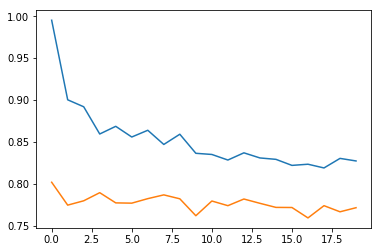

In [17]:
plt.plot(np.mean(train_scores, axis=1))
plt.plot(np.mean(valid_scores, axis=1))

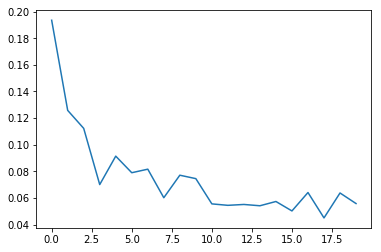

In [18]:
k_mean_train = np.mean(train_scores, axis=1)
k_mean_valid = np.mean(valid_scores, axis=1)
k_mean_change = k_mean_train - k_mean_valid
plt.plot(k_mean_change)

In [24]:
fpr, tpr, threshold = eva.roc_curve(y_test, knn.predict_proba(X_test)[:,1])
roc_auc = eva.auc(fpr, tpr)
print(roc_auc)

0.8354180381830152


<IPython.core.display.Javascript object>


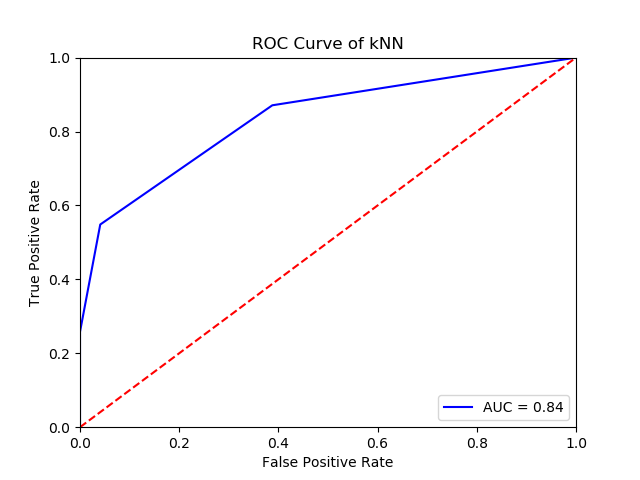

In [25]:
%matplotlib notebook
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [22]:

h = .02  # step size in the mesh
n_neighbors = 15
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

NameError: name 'ListedColormap' is not defined

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [72]:
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [73]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [74]:
np.arange(x_min, x_max, h).shape, np.arange(y_min, y_max, h).shape

((280,), (220,))

<IPython.core.display.Javascript object>


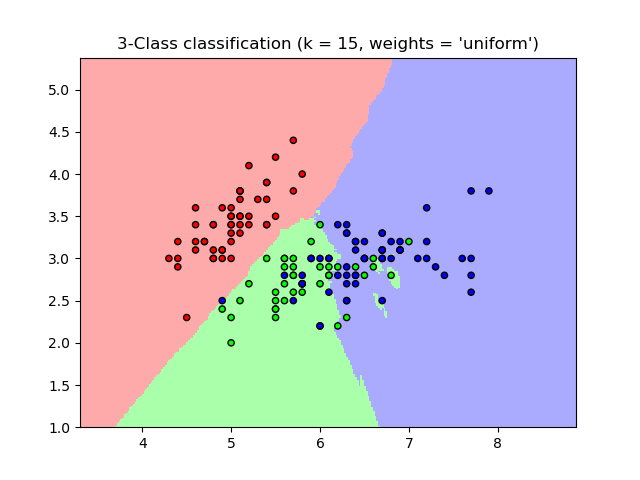

<IPython.core.display.Javascript object>


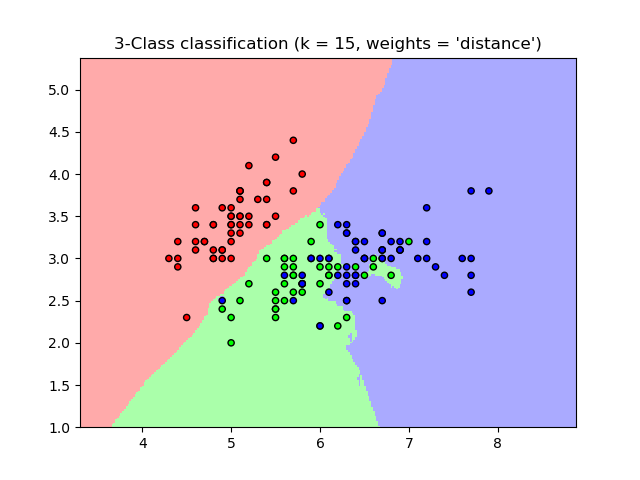

In [53]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()